<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:

1.Algoritma KNN(K-nearest Neighbor) adalah dengan cara mengambil sejumlah K tetangga terdekat
misal : terdapat sebuah data label yang ingin diprediksi, apabila K nya berisi 3 maka data label yang ingin diprediksi itu akan melihat 3 tetangga terdekatnya. Apabila tetangga terdekat nya itu menghasilkan 2 data dengan Label A dan 1 data dengan label B maka data label yang akan diprediksi akan diberi label A.

Proses:

menghitung jarak dirinya(data yang ingin di prediksi) ke setiap data point dengan menggunakan rumus euclidan distance.
setelah itu ia akan memilih sebanyak K terdekat.
Lalu ia akan melakukan voting.

2. kekurangan algoritma KNN:

KNN itu sangat sensitif terhadap data pencilan(outlier) atau dapat dikatakan bahwa pencilan adalah sekumpulan data yang terletak jauh dari pusat data.
KNN kebingungan apabila K nya berisi genap dan menghasilkan voting yang sama besar.
Perlu menunjukkan parameter K (jumlah tetangga terdekat).
Tidak menangani nilai hilang (missing value) secara implisit.
Biaya komputasi cukup tinggi karena diperlukan perhitungan jarak dari setiap sampel uji pada keseluruhan sampel latih.
Rentan terhadap variabel yang non-informatif.
Rentan terhadap dimensionalitas yang tinggi.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

# melakukan pemecahan data menjadi data train dan juga data test dengan data train sebanyak 0.8 dan data test 0.2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [2]:

# import model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# mencari k yang terbaik dalam model KNN
k_range = list(range(2,21))
weight= ['uniform', 'distance']
score = []
jml = 0
for w in weight:
    score.append([])
    for k in k_range:
        # membuat model KNN
        knn = KNeighborsClassifier(n_neighbors = k, weights = w)
        # melakukan fit model
        knn.fit(X_train, y_train)
        # melakukan predict model
        y_predict = knn.predict(X_test)
        # melihat accuracy score dari model yang telah dibuat
        score[jml].append(accuracy_score(y_test, y_predict))
    jml += 1

In [3]:
score

[[0.6944444444444444,
  0.8055555555555556,
  0.7222222222222222,
  0.6666666666666666,
  0.6388888888888888,
  0.75,
  0.6388888888888888,
  0.6944444444444444,
  0.6944444444444444,
  0.7222222222222222,
  0.6388888888888888,
  0.6666666666666666,
  0.6388888888888888,
  0.6666666666666666,
  0.6111111111111112,
  0.6666666666666666,
  0.6388888888888888,
  0.6666666666666666,
  0.6111111111111112],
 [0.75,
  0.8333333333333334,
  0.7777777777777778,
  0.75,
  0.7222222222222222,
  0.75,
  0.6944444444444444,
  0.7222222222222222,
  0.6944444444444444,
  0.6944444444444444,
  0.6944444444444444,
  0.6944444444444444,
  0.6944444444444444,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666]]

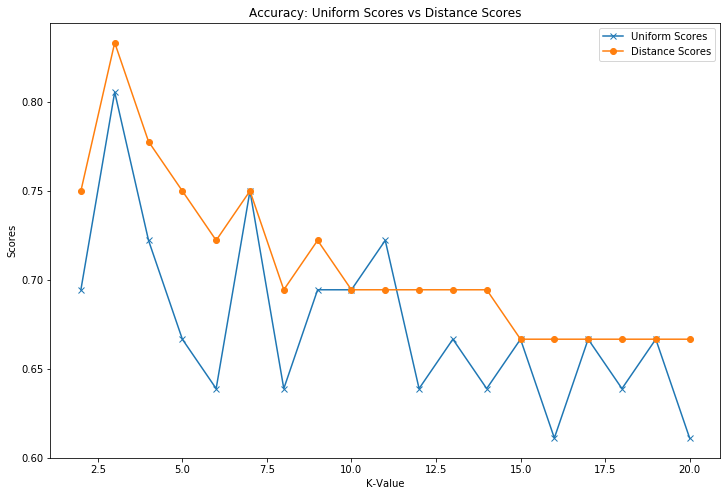

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(k_range, score[0], marker='x', linestyle='-' , label='Uniform Scores')
plt.plot(k_range, score[1], marker='o', linestyle='-' , label='Distance Scores')

plt.legend()
plt.xlabel('K-Value')
plt.ylabel('Scores')
plt.title('Accuracy: Uniform Scores vs Distance Scores')
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [6]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression()

In [8]:

#To retrieve the intercept:
print('parameter intercept: ', regressor.intercept_)

#For retrieving the slope:
print('parameter koefesien: ',regressor.coef_)

parameter intercept:  0.5000000016247412
parameter koefesien:  [ 1.5 -5.   9.  10. ]
